# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [ ]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
# Extract all rows of data
rows = soup.find_all('tr') [1:] #this skips the header
# print(rows)
for r in rows:
    print(r.text) 


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181
2012-09-15
39
171
6
-75.0
751.0


182
2012-09-16
40
17

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create an empty list
rows_list = []

# Loop through the scraped data to create a list of rows
for row in rows:
    # Find all cells (both 'td' for data and 'th' for headers)
    cells = row.find_all(['td', 'th'])
    
    # Extract text from each cell and strip whitespace
    row_data = [cell.get_text(strip=True) for cell in cells]
    
    # Add row data to the list
    if row_data:  # Ensure empty rows aren't added
        rows_list.append(row_data)

# Print the list of rows
rows_list
# for columns in rows_list:
#     print(columns)

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [12]:
#alt option
# mars_table = soup.find('table', class_='table')
# rows = soup.find_all('tr') [1:] #this skips the header

# mars_df = []

# for r in rows:
#     cols = r.find_all('td') #finding each column for each row
#     rows_df = [col.text.strip() for col in cols]
#     mars_df.append(rows_df)

# mars_df

In [13]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'] #clarifying the column headers

columns_df = pd.DataFrame(rows_list, columns=columns)

# Confirm DataFrame
columns_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [ ]:
# Confirm DataFrame was created successfully

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
print(columns_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [ ]:
# Examine data type of each column

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [15]:
# Change data types for data analysis
columns_df['id'] = columns_df['id'].astype('object')
columns_df['terrestrial_date'] = pd.to_datetime(columns_df['terrestrial_date'])
columns_df['sol'] = pd.to_numeric(columns_df['sol'], downcast='integer')
columns_df['ls'] = pd.to_numeric(columns_df['ls'], downcast='integer')
columns_df['month'] = pd.to_numeric(columns_df['month'], downcast='integer')
columns_df['min_temp'] = pd.to_numeric(columns_df['min_temp'], errors='coerce').astype('float64')
columns_df['pressure'] = pd.to_numeric(columns_df['pressure'], errors='coerce').astype('float64')

#alt option for the last two columns, but it outputs float32
# columns_df['min_temp'] = pd.to_numeric(columns_df['min_temp'], downcast='float')
# columns_df['pressure'] = pd.to_numeric(columns_df['pressure'], downcast='float')


print(columns_df.dtypes)
# print(columns_df)

id                          object
terrestrial_date    datetime64[ns]
sol                          int16
ls                           int16
month                         int8
min_temp                   float64
pressure                   float64
dtype: object


In [ ]:
#alt option to change data types
# columns_df = columns_df.astype({'id': object, 'terrestrial_date': date, 'sol': int, 'ls': int, 'month': int, 'min_temp': float, 'pressure': float})
# print(columns_df.dtypes)
# print(columns_df)

In [ ]:
# Confirm type changes were successful by examining data types again
print(columns_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# How many months are there on Mars?
months = columns_df['month'].nunique()
months

# print(f'There are {months} months on Mars.')

12

In [ ]:
# 1. How many months are there on Mars?

12

In [ ]:
#actually showing the unique values of the months listed in the months column (my add)
# unique_counts = columns_df['month'].value_counts()
# unique_counts

In [17]:
# How many sols (Martian days) worth of data are there?
sols_data = columns_df['terrestrial_date'].nunique()
sols_data

# print(f'There are {sols_data} Martian days worth of data.')

1867

In [ ]:
# 2. How many sols (Martian days) worth of data are there?

1867

In [40]:
#showing the unique count values w/in the terrestial_date column (my add) len this the value we want
# sols_data = columns_df['terrestrial_date'].value_counts()
# sols_data

In [101]:
# columns_df.head()

In [18]:
# What is the average minimum temperature by month?
average_min_temp = columns_df['min_temp'].mean() #finding the overall avg temp
# average_min_temp

avg_temp_month = columns_df.groupby('month')['min_temp'].mean()
avg_temp_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [ ]:
# 3. What is the average minimum temperature by month?

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


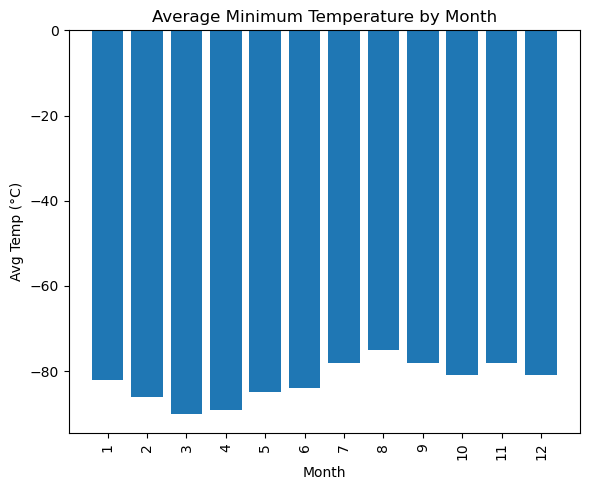

In [19]:
# Plot the average minimum temperature by month
# plt_columns = ['month', 'min_temp'] #clarifying which columns I want to plot
# columns_df[plt_columns].plot(kind='bar')

x = columns_df['month']
y = columns_df['min_temp']

plt.figure(figsize=(6, 5))
plt.bar(x,y)

plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Avg Temp (°C)')
plt.xticks(rotation=90)
plt.xticks(range(1, 13)) #makes all x-values visible
plt.tight_layout()
plt.show()


In [18]:
#alt option for graphing
# plt.bar(columns_df['month'], columns_df['min_temp'])

# plt.title('Average Minimum Temperature by Month')
# plt.xlabel('Month')
# plt.ylabel('Avg Temp (°C)')
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

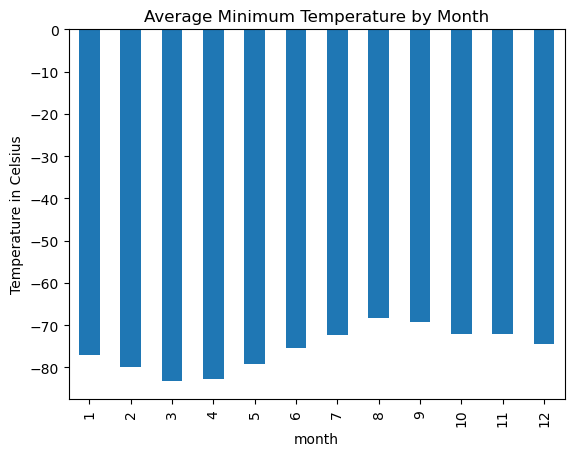

In [ ]:
# Plot the average minimum temperature by month

In [100]:
# avg_temp_month.head()

In [47]:
#my add to get the graph below, not the graph wanted though...
# coldest_month = avg_temp_month.idxmin() #calc the month of the min temp
# coldest_month
# hottest_month = avg_temp_month.idxmax() #calc ther month of the max temp
# hottest_month

# min_temp = avg_temp_month.min() #calc the coldest temp
# min_temp
# max_temp = avg_temp_month.max() #calc the hottest temp
# max_temp

In [1]:
# Sort months by average min temperature
# sorted_temps = avg_temp_month.sort_values()

# plt.figure(figsize=(6.5, 5))
# plt.bar(sorted_temps.index, sorted_temps.values, color='skyblue')

# # Add labels
# plt.xlabel('month')
# plt.ylabel('Average Minimum Temperature (°C)')
# plt.title('Average Minimum Temperature by Month')

# # Highlight coldest and hottest months
# plt.bar(coldest_month, min_temp, color='blue', label='Coldest Month')
# plt.bar(hottest_month, max_temp, color='red', label='Hottest Month')

# plt.legend()
# plt.show()

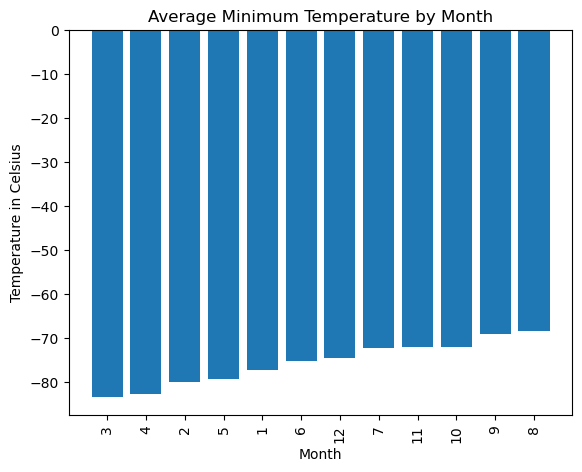

In [20]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Calculate the average minimum temperature by month
avg_min_temp_by_month = avg_temp_month.sort_values(ascending=True)

# Sort the months by temperature
sorted_avg_min_temp = avg_min_temp_by_month.index.astype(str) #allows the months to be graphed w/out reordering

# Plot the sorted bar graph
plt.figure(figsize=(6.5, 5))
plt.bar(sorted_avg_min_temp, avg_min_temp_by_month.values)

# Labels and title
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')
plt.xticks(rotation=90)

# Show the plot
plt.show()

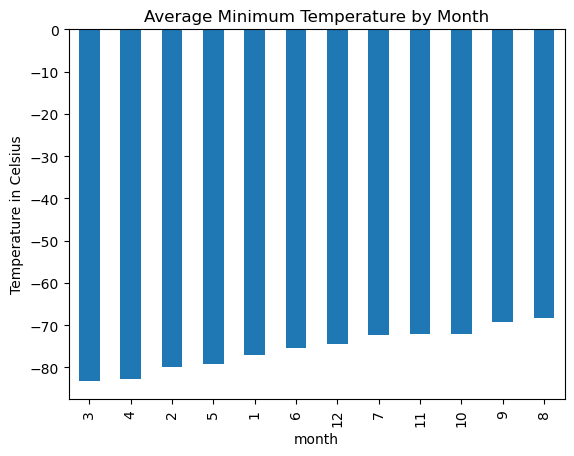

In [ ]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

In [99]:
# columns_df.head()

In [21]:
# What is the average pressure by month?
average_press = columns_df['pressure'].mean() #finding the overall avg pressure
# average_press

avg_press_month = columns_df.groupby('month')['pressure'].mean()
avg_press_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [ ]:
# 4. What is the average pressure by month?

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


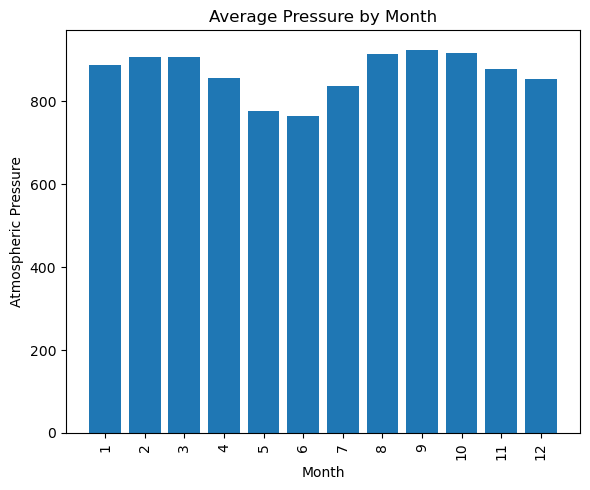

In [22]:
# Plot the average pressure by month
plt.figure(figsize=(6, 5))
plt.bar(columns_df['month'], columns_df['pressure'])
#plt.bar(avg_pressure_by_month.index, avg_pressure_by_month.values)

plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(range(1, 13)) #makes all x-values visible
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

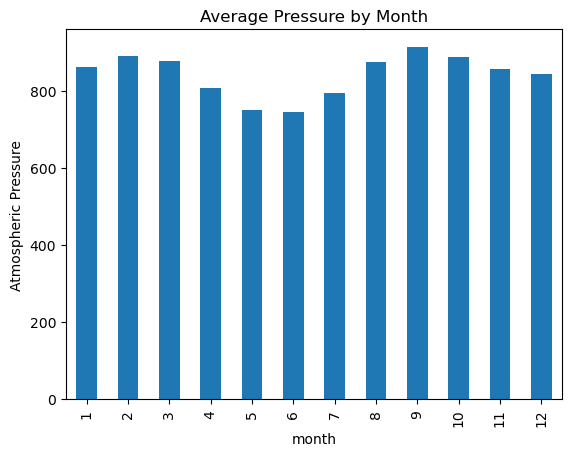

In [ ]:
# Plot the average pressure by month

In [ ]:
#my add to identify the lowest and highest pressure months
# lowest_month = avg_press_month.idxmin()
# lowest_month
# highest_month = avg_press_month.idxmax()
# highest_month

# sorted_avg_press = avg_press_month.sort_values() #sorting the months by average press
# sorted_avg_press

# lowest_press = sorted_avg_press.min()
# lowest_press
# highest_press = sorted_avg_press.max()
# highest_press

In [ ]:
# sorted_avg_press = avg_press_month.sort_values(ascending=True) #sorting the months by average press
# # sorted_avg_press
# sorted_press_month = sorted_avg_press.index.astype(str)
# # sorted_press_month

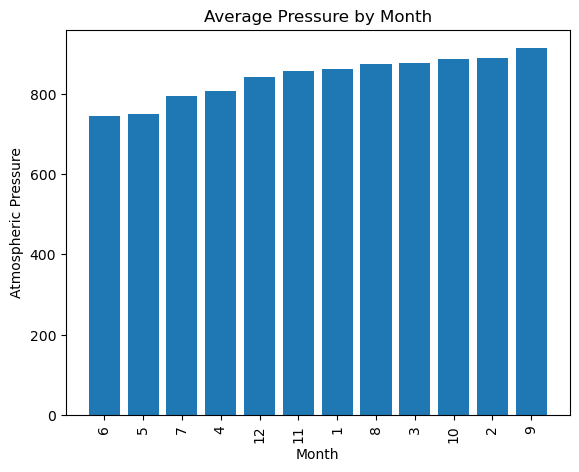

In [23]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_press = avg_press_month.sort_values(ascending=True) #sorting the months by average press
# sorted_avg_press
sorted_press_month = sorted_avg_press.index.astype(str)
# sorted_press_month

plt.figure(figsize=(6.5, 5))
plt.bar(sorted_press_month, sorted_avg_press.values)

# Titles and labels
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(sorted_press_month) #labels accordingly to their respective months
plt.xticks(rotation=90)

# Show the plot
plt.show()

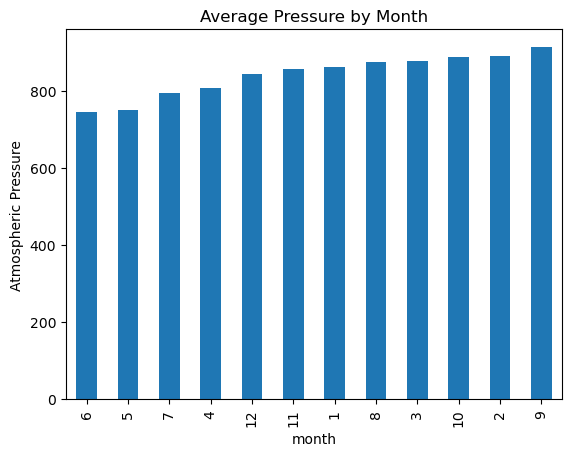

In [ ]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

In [1]:
# columns_df.head()

There are 1867 Earth days in a Martian year


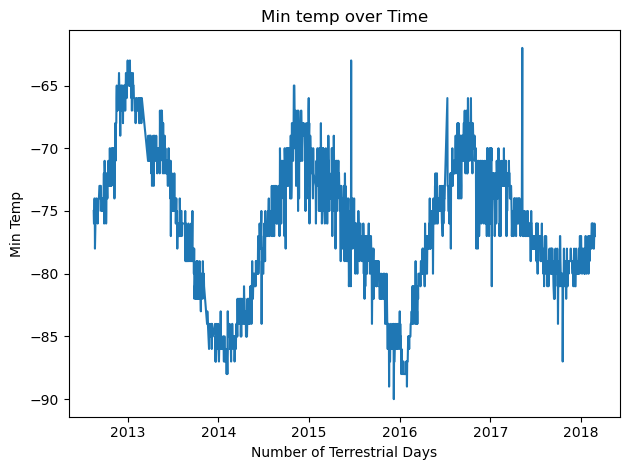

In [24]:
# How many terrestrial (Earth) days are there in a Martian year?
earth_days = columns_df['terrestrial_date'].nunique()
print(f'There are {earth_days} Earth days in a Martian year')

# visually estimate the result by plotting the daily minimum temperature of each observation in the data set
plt.plot(columns_df['terrestrial_date'], columns_df['min_temp'])
# columns_df.plot(x='terrestrial_date', y='min_temp')
plt.title('Min temp over Time')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Min Temp')
plt.tight_layout()
plt.show()


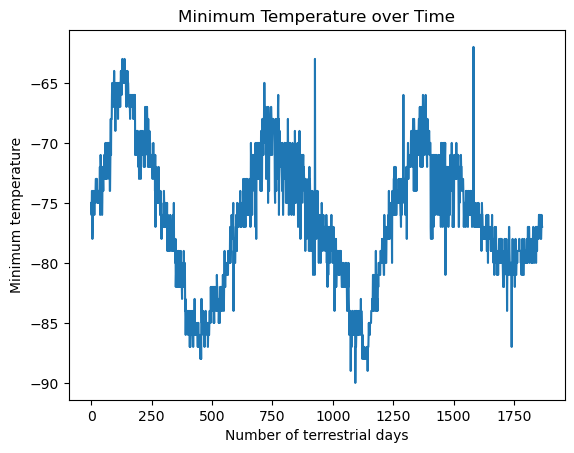

In [ ]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

In [30]:
# Filter data for the years 2014 to 2016
filtered_mars_df = columns_df[(columns_df['terrestrial_date'] >= '2014-01-01') & 
                           (columns_df['terrestrial_date'] <= '2016-12-31')]

# Apply a rolling mean to smooth out temperature fluctuations (30-day window)
filtered_mars_df.loc[:, 'smoothed_temp'] = filtered_mars_df['min_temp'].rolling(window=30, center=True).mean()


# Find the coldest point in 2014
min_temp_2014 = filtered_mars_df[
    (filtered_mars_df['terrestrial_date'] >= '2014-01-01') & 
    (filtered_mars_df['terrestrial_date'] <= '2014-12-31')
].nsmallest(1, 'smoothed_temp')

# Find the earliest coldest point in 2016 this is x earth days after 2014
min_temp_2016 = filtered_mars_df[
    (filtered_mars_df['terrestrial_date'] >= '2016-01-01')
].nsmallest(5, 'smoothed_temp')  # Take 5 coldest points and filter from there

# Ensure we get the first unique cold point after 2014
first_min_date = min_temp_2014['terrestrial_date'].values[0]
latest_min_date = min_temp_2016[
    min_temp_2016['terrestrial_date'] > first_min_date + pd.Timedelta(days=300)
]['terrestrial_date'].min()

# Calculate the estimated Martian year length in Earth days
martian_year_days = (latest_min_date - first_min_date).days

# Print the estimated Martian year length
print(f"Estimated length of a Martian year (coldest points from 2014 to 2016): {martian_year_days} Earth days")
print(first_min_date)
print(latest_min_date)

Estimated length of a Martian year (coldest points from 2014 to 2016): 726 Earth days
2014-01-23T00:00:00.000000000
2016-01-19 00:00:00


/var/folders/hc/nkkc_9yd3fd9x9025zg61t2w0000gn/T/ipykernel_30583/1462594953.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_mars_df.loc[:, 'smoothed_temp'] = filtered_mars_df['min_temp'].rolling(window=30, center=True).mean()


In [98]:
# avg_min_temp_by_month
# sorted_avg_press

#### Minimum Temperature

March has the lowest min temp (-83.30), and August has the highest min temp (-68.38).

#### Atmospheric Pressure

June has the lowest atmospheric pressure (745.05) and September has the highest atmospheric pressure (913.30)

#### Year Length

With the calculations above, from the coldest temp in 2014 and 2016, there sems to be about 726 earth days in a Martian year.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
columns_df.to_csv('mars_data_output.csv', index=False, header=True)

In [31]:
browser.quit()